In [57]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df=pd.read_csv(r"F:\Fall21\Accident.csv")
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.1,36.1,58.0,29.76,10.0,SW,10.4,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.0,NaN,97.0,29.70,10.0,Calm,NaN,0.02,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.0,NaN,55.0,29.65,10.0,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.0,29.8,93.0,29.69,10.0,WSW,10.4,0.01,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [59]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [60]:
print(df.shape)
df.dropna(inplace = True)
print(df.shape)

(2845342, 47)
(943318, 47)


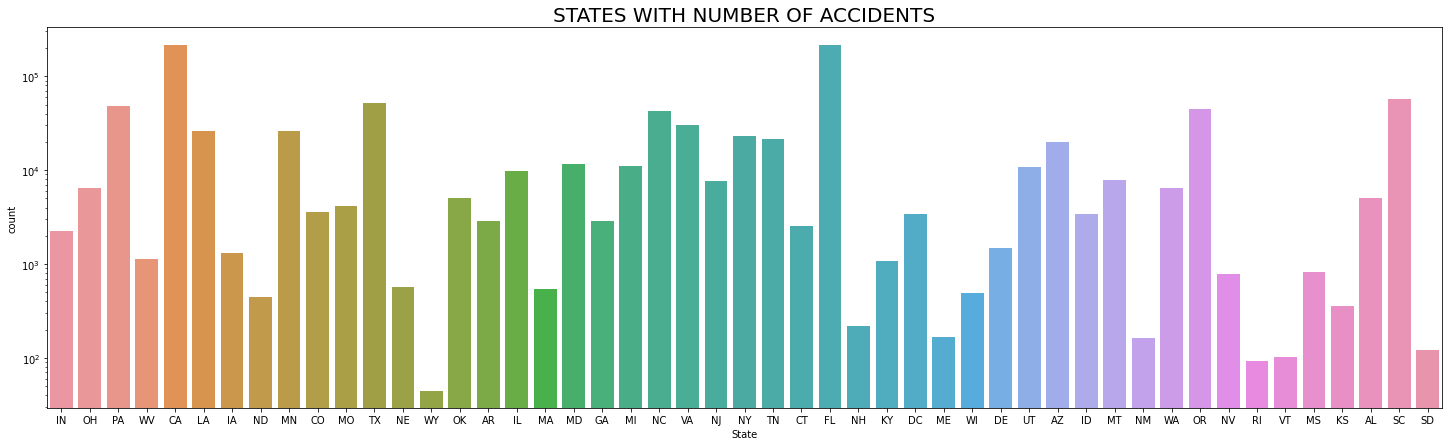

In [61]:
plt.figure(figsize=(25,7))
sns.countplot(x="State",data=df)
plt.yscale("log")
plt.title("STATES WITH NUMBER OF ACCIDENTS",fontsize=20)
plt.show()

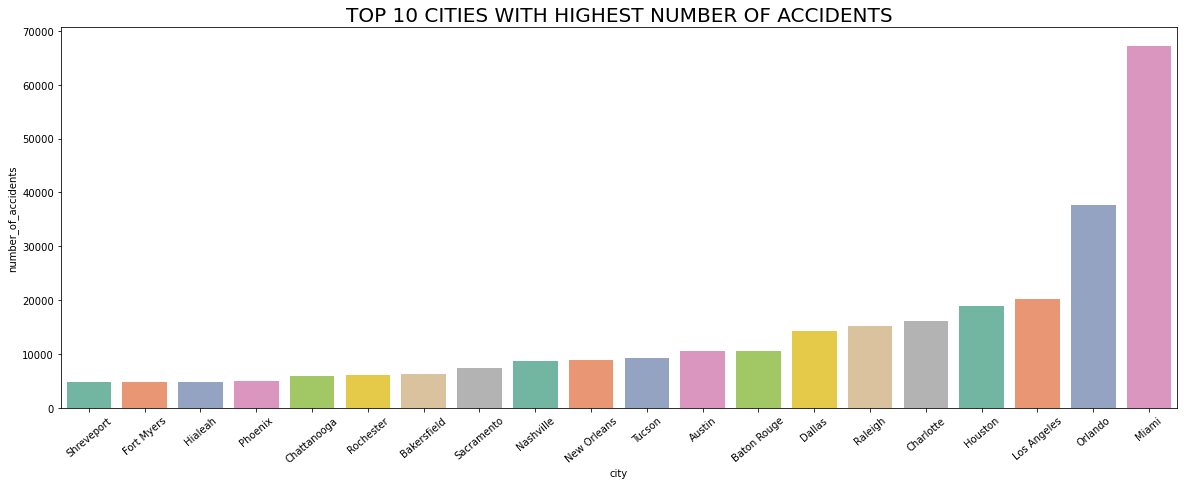

In [62]:
top_cities=df["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["city","number_of_accidents"]

plt.figure(figsize=(20,7))
sns.barplot(x="city",y="number_of_accidents",data=top_cities , palette='Set2')
plt.title("TOP 10 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20)
plt.xticks(rotation=40)
plt.show()

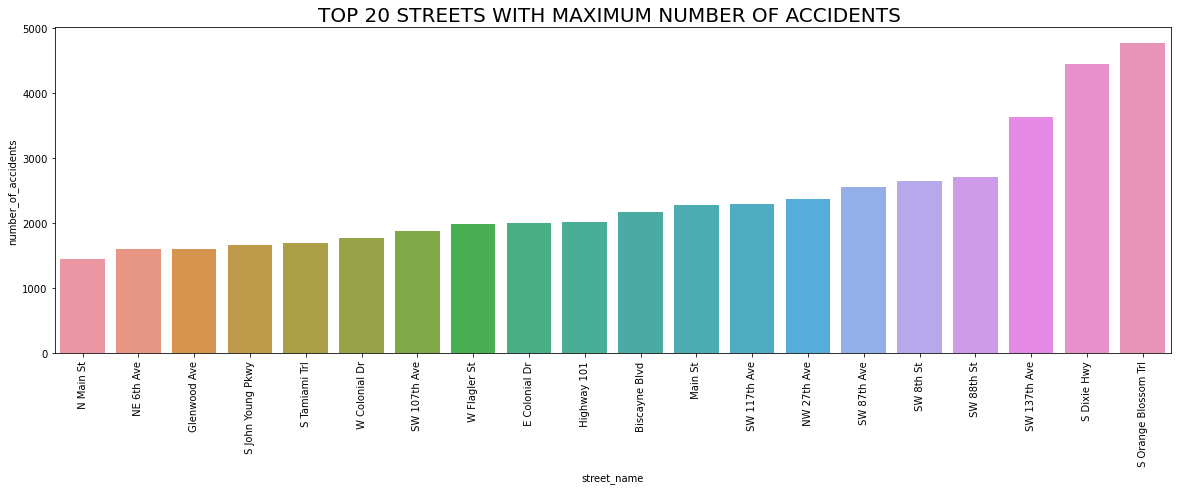

In [63]:
top_streets=df["Street"].value_counts().sort_values()[-20:].reset_index()
top_streets.columns=["street_name","number_of_accidents"]

plt.figure(figsize=(20,6))
sns.barplot(x=top_streets["street_name"],y=top_streets["number_of_accidents"])
plt.xticks(rotation=90)
plt.title("TOP 20 STREETS WITH MAXIMUM NUMBER OF ACCIDENTS ",fontsize=20)
plt.show()

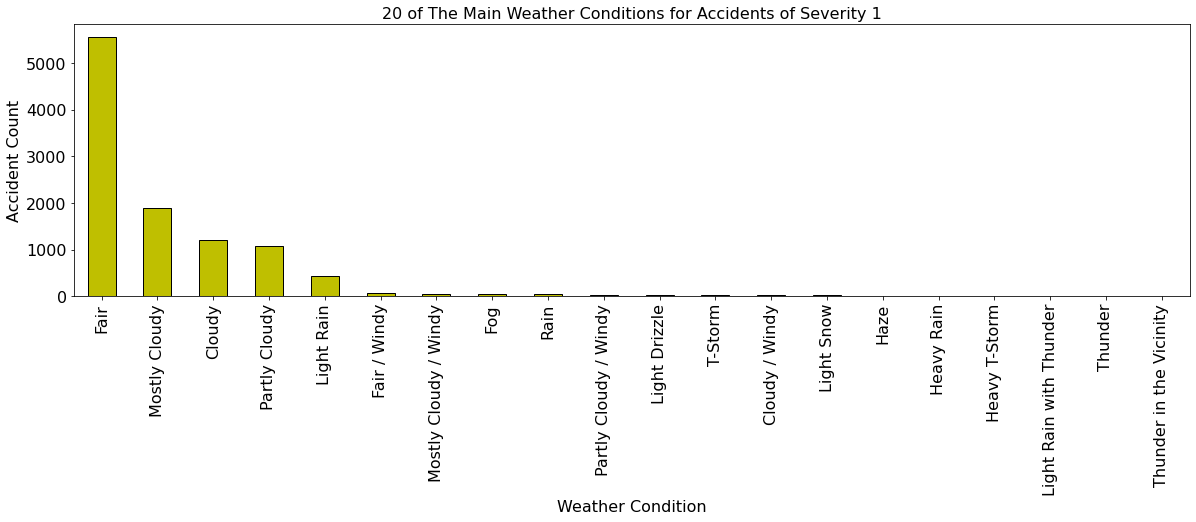

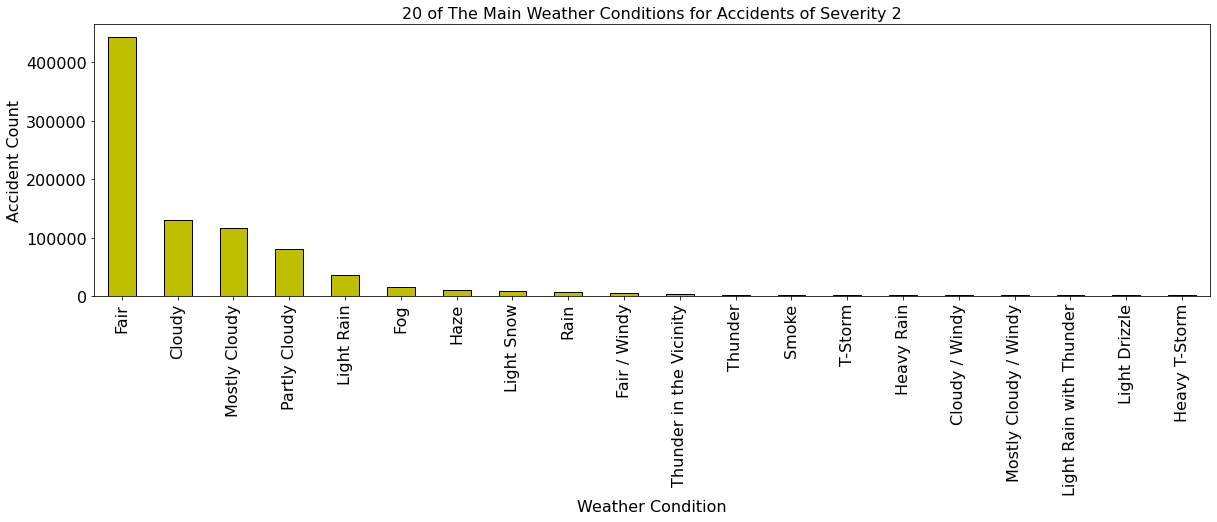

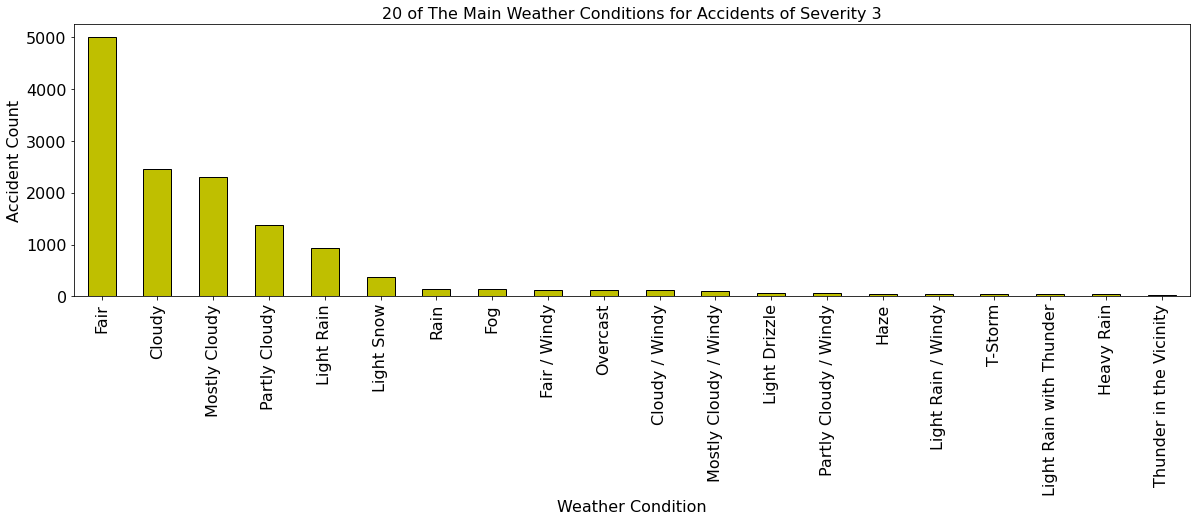

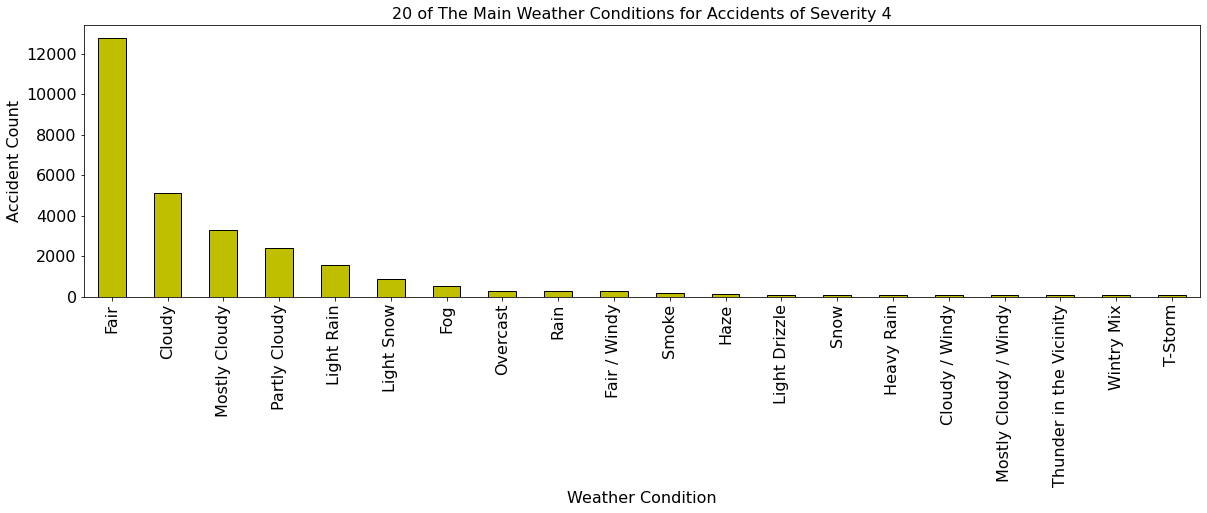

In [64]:

for x in np.arange(1,5):
    plt.subplots(figsize=(20,5))
    df.loc[df["Severity"] == x]['Weather_Condition'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Weather Condition',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.title('20 of The Main Weather Conditions for Accidents of Severity ' + str(x),fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


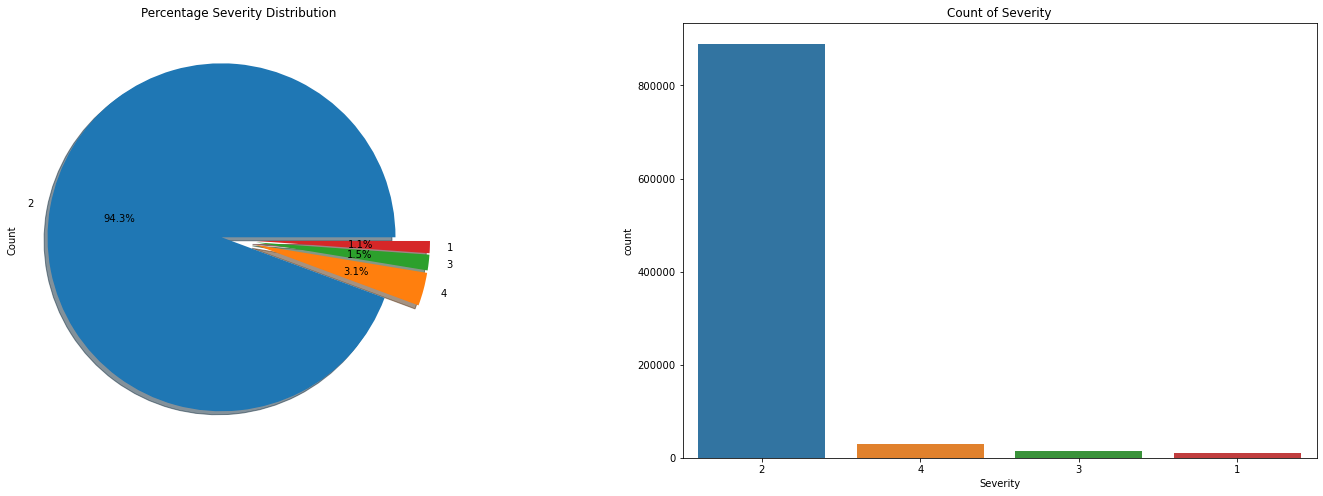

In [65]:
f,ax=plt.subplots(1,2,figsize=(25,8))
df['Severity'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

In [66]:
# Drop ID column
df.drop(columns = ['ID'], inplace = True)
df.drop(columns = ['Description'], inplace = True)

In [67]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['Start_Time', 'End_Time', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Wind_Direction', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [68]:
from sklearn import preprocessing

for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943318 entries, 42 to 2845307
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               943318 non-null  int64  
 1   Start_Time             943318 non-null  int32  
 2   End_Time               943318 non-null  int32  
 3   Start_Lat              943318 non-null  float64
 4   Start_Lng              943318 non-null  float64
 5   End_Lat                943318 non-null  float64
 6   End_Lng                943318 non-null  float64
 7   Distance(mi)           943318 non-null  float64
 8   Number                 943318 non-null  float64
 9   Street                 943318 non-null  int32  
 10  Side                   943318 non-null  int32  
 11  City                   943318 non-null  int32  
 12  County                 943318 non-null  int32  
 13  State                  943318 non-null  int32  
 14  Zipcode                943318 non-

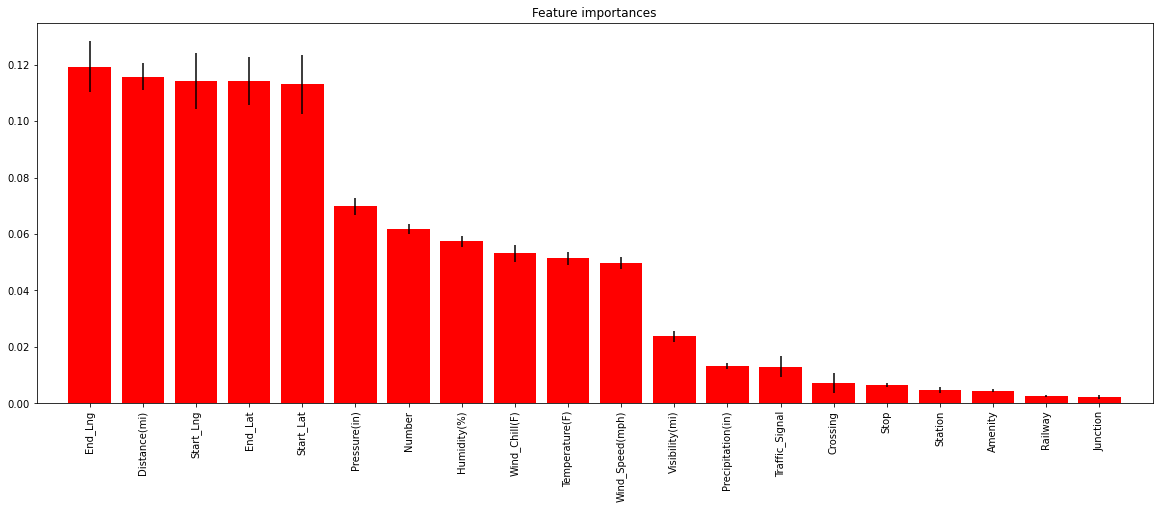

In [70]:
train_y = df['Severity'].values
x_cols = [col for col in df.columns if col not in ['Severity'] if df[col].dtype=='float64'or df[col].dtype=='int64']
train_col= df[x_cols]

fearture_name = train_col.columns.values 

from sklearn import ensemble 

model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_col,train_y)


importance = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(20,7))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), fearture_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [71]:
y = df['Severity'].copy()
X = df.drop('Severity', axis=1).copy()

In [72]:
y.unique()

array([4, 2, 3, 1], dtype=int64)

In [73]:
y = y-1

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [75]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [77]:
X_train.shape

(754654, 44)

In [78]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(754654, 44) (188664, 44) (754654,) (188664,)


In [79]:
import tensorflow as tf

In [80]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras



In [81]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (44,1)))
model.add(Dropout (0.4))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25,activation='relu'))
model.add(Dense(20))


In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 44, 128)           66560     
                                                                 
 dropout_2 (Dropout)         (None, 44, 128)           0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_4 (Dense)             (None, 25)                1625      
                                                                 
 dense_5 (Dense)             (None, 20)                520       
                                                                 
Total params: 118,113
Trainable params: 118,113
Non-trainable params: 0
_________________________________________________________________


In [83]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [84]:
model.fit(X_train, y_train, batch_size=128, epochs=10)


Epoch 1/10
5896/5896 [==============================] - 675s 113ms/step - loss: 0.8788 - accuracy: 0.9434
Epoch 2/10
5896/5896 [==============================] - 613s 104ms/step - loss: 0.9097 - accuracy: 0.9436
Epoch 3/10
5896/5896 [==============================] - 603s 102ms/step - loss: 0.9097 - accuracy: 0.9436
Epoch 4/10
5896/5896 [==============================] - 627s 106ms/step - loss: 0.9097 - accuracy: 0.9436
Epoch 5/10
5896/5896 [==============================] - 2066s 350ms/step - loss: 0.9097 - accuracy: 0.9436
Epoch 6/10
5896/5896 [==============================] - 688s 117ms/step - loss: 0.9097 - accuracy: 0.9436
Epoch 7/10
5896/5896 [==============================] - 750s 127ms/step - loss: 0.9097 - accuracy: 0.9436
Epoch 8/10
5896/5896 [==============================] - 756s 128ms/step - loss: 0.9097 - accuracy: 0.9436
Epoch 9/10
5896/5896 [==============================] - 777s 132ms/step - loss: 0.9097 - accuracy: 0.9436
Epoch 10/10
5896/5896 [======================